# Best movie streaming platform in python


In [1]:
pip install cufflinks


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
fig = go.Figure()

from wordcloud import WordCloud

import plotly.express as px 
%matplotlib inline

D:\ python\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [4]:
path = 'moviestreams.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


# Perfroming EDA

In [5]:
cols = data.columns.tolist()
cols

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

# Dropping Columns - Id and Unnamed# Dropping Columns - Id and Unnamed

In [6]:
data.drop(['Unnamed: 0','ID',], axis=1, inplace = True)
cols = data.columns.tolist()
cols

['Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   object 
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   object 
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Type             16744 non-null  int64  
 10  Directors        16018 non-null  object 
 11  Genres           16469 non-null  object 
 12  Country          16309 non-null  object 
 13  Language         16130 non-null  object 
 14  Runtime          16152 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.9+ MB


# Checking Missing Data

In [8]:
print("Percentage Missing Data")
(data.isnull().sum()/data.shape[0])*100

Percentage Missing Data


Title               0.000000
Year                0.000000
Age                56.079790
IMDb                3.410177
Rotten Tomatoes    69.194935
Netflix             0.000000
Hulu                0.000000
Prime Video         0.000000
Disney+             0.000000
Type                0.000000
Directors           4.335882
Genres              1.642379
Country             2.597946
Language            3.666985
Runtime             3.535595
dtype: float64

In [9]:
data.Age.value_counts()

Age
18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: count, dtype: int64

In [10]:
age_map = {'18+' : 18, '7+' : 7, '13+': 13, 'all' : 0, '16+' : 16}
data['intAge'] = data['Age'].map(age_map)

In [11]:
data.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,intAge
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,13.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,18.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,13.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,7.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,18.0


In [12]:
data['Rotten Tomatoes'].value_counts().sort_values(ascending=False)

Rotten Tomatoes
100%    407
80%     162
50%     136
83%     131
67%     126
       ... 
28%      10
7%       10
4%        9
3%        4
2%        4
Name: count, Length: 99, dtype: int64

# Process Rotten Tomatoes column and convert it to remove %.

In [13]:
data['New_Rotten_Tomatoes'] = data['Rotten Tomatoes'].str.replace("%","")
for i in data['New_Rotten_Tomatoes']:
    if i is str:
        i = i.astype(int)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                16744 non-null  object 
 1   Year                 16744 non-null  int64  
 2   Age                  7354 non-null   object 
 3   IMDb                 16173 non-null  float64
 4   Rotten Tomatoes      5158 non-null   object 
 5   Netflix              16744 non-null  int64  
 6   Hulu                 16744 non-null  int64  
 7   Prime Video          16744 non-null  int64  
 8   Disney+              16744 non-null  int64  
 9   Type                 16744 non-null  int64  
 10  Directors            16018 non-null  object 
 11  Genres               16469 non-null  object 
 12  Country              16309 non-null  object 
 13  Language             16130 non-null  object 
 14  Runtime              16152 non-null  float64
 15  intAge               7354 non-null  

In [15]:
data['New_Rotten_Tomatoes']

0         87
1         87
2         84
3         96
4         97
        ... 
16739    NaN
16740    NaN
16741    NaN
16742    NaN
16743    NaN
Name: New_Rotten_Tomatoes, Length: 16744, dtype: object

# Plotting Graphs

Checking Number of Movies in a given Age group per Streaming Service

In [16]:
data['Age'].value_counts().iplot('bar', xTitle='Age Group', 
                                        yTitle='Count of Movies', 
                                        title="Number of Movies in specific age group in All services")

In [17]:
##Analyzing number of Movies in speific age group in NetFlix

In [18]:
data_netflix = data.copy()
data_netflix = data_netflix[data['Netflix']==1]
data_netflix['Age'].value_counts().iplot('bar', colors='Blue', xTitle='Age Group', 
                                        yTitle='Count of Movies', 
                                        title="Number of Movies in specific age group in NetFlix")

In [19]:
data_hulu = data.copy()
data_hulu = data_hulu[data['Hulu']==1]
data_hulu['Age'].value_counts().iplot('bar', colors='Red', xTitle='Age Group', 
                                        yTitle='Count of Movies', 
                                        title="Number of Movies in specific age group in Hulu")

In [20]:
data_prime = data.copy()
data_prime = data_prime[data['Prime Video']==1]
data_prime['Age'].value_counts().iplot('bar', colors='Black', xTitle='Age Group', 
                                        yTitle='Count of Movies', 
                                        title="Number of Movies in specific age group in Prime Video")

In [21]:
data_disney = data.copy()
data_disney = data_disney[data['Disney+']==1]
data_disney['Age'].value_counts().iplot('bar', colors='Purple', 
                                        xTitle='Age Group', 
                                        yTitle='Count of Movies', 
                                        title="Number of Movies in specific age group in Disney+")

# Rotten Tomatoes Score

In [22]:
data['Rotten Tomatoes'].value_counts().iplot(kind = 'bar', colors = 'Cyan', xTitle = "Ratings", yTitle="Number of Movies", title="Overall Rotten Tomato Ratings")

In [23]:
rotten_tomato_scores = pd.DataFrame({'Streaming Service': ["Prime Video", "Hulu","Disney+","NetFlix"],
                                    'Rotten Tomato Score' : [data_prime['Rotten Tomatoes'].value_counts()[0], 
                                                             data_hulu['Rotten Tomatoes'].value_counts()[0],
                                                             data_disney['Rotten Tomatoes'].value_counts()[0],
                                                             data_netflix['Rotten Tomatoes'].value_counts()[0]]})
rotten_tomato_scores.head()


,Streaming Service,Rotten Tomato Score
0,Prime Video,257
1,Hulu,18
2,Disney+,19
3,NetFlix,130


In [24]:
rotten_tomato_scores.sort_values(ascending=False, by="Rotten Tomato Score").iplot(kind='bar', x='Streaming Service', y='Rotten Tomato Score', 
                           color='Violet', xTitle="Streaming Service", 
                           yTitle="Count of Movies with Score of 100%", 
                           title="Streaming Service with 100% Rotten Tomato Score")

# IMDB Ratings

In [25]:
data['IMDb'].value_counts().iplot(kind="bar", color="Red", xTitle='IMDb Ratings', yTitle="Count of Movies", title = "Count of Movies vs IMDb Ratings")

In [26]:
def get_imdb_count_per_service(d):
    # This function returns the number of movies in a service having IMDb score greater than 7.5
    num_of_movies = 0
    for key, value in d.items():
        if float(key) >= 7.5:
            num_of_movies += value
    return num_of_movies


In [27]:
imdb_prime_count = get_imdb_count_per_service(dict(data_prime['IMDb'].value_counts().sort_values(ascending=False)))
imdb_hulu_count = get_imdb_count_per_service(dict(data_hulu['IMDb'].value_counts().sort_values(ascending=False)))
imdb_disey_count = get_imdb_count_per_service(dict(data_disney['IMDb'].value_counts().sort_values(ascending=False)))
imdb_netflix_count = get_imdb_count_per_service(dict(data_netflix['IMDb'].value_counts().sort_values(ascending=False)))

imdb_scores = pd.DataFrame({'Streaming Service': ["Prime Video", "Hulu","Disney+","NetFlix"],
                                    'IMDb Score' :[imdb_prime_count, imdb_hulu_count, imdb_disey_count, imdb_netflix_count] })
imdb_scores.head()

,Streaming Service,IMDb Score
0,Prime Video,1104
1,Hulu,97
2,Disney+,89
3,NetFlix,476


In [28]:
imdb_scores.sort_values(ascending=False, by='IMDb Score').iplot(kind="bar", color="Cyan",x='Streaming Service', 
                  xTitle='Streaming Service', 
                  yTitle="Count of Movies with IMDB Score >=7.5", 
                  title = "Streaming Services with Movies having IMDB >= 7.5")

Prime Video has highest number of movies with IMDB more than 7.5!

# Explore Languages

In [29]:
data['Language'].value_counts()

Language
English                                                                             10955
Hindi                                                                                 503
English,Spanish                                                                       276
Spanish                                                                               267
English,French                                                                        174
                                                                                    ...  
English,German,Hungarian,Romanian                                                       1
English,Spanish,Chinese,Latin                                                           1
English,Danish,Malay,Dutch,Indonesian,Finnish,Luxembourgish,French Sign Language        1
Dutch,French                                                                            1
English,Algonquin                                                                       1
N

Getting total languages in dataset

In [30]:
%%time
languages_dict = dict(data['Language'].value_counts())
languages = set()
for lang,count in languages_dict.items():
    curr_lang = lang
    curr_langs = curr_lang.split(",")
    for i in curr_langs:
        if i in languages:
            continue
        else:
            languages.add(i.lower())
languages = list(languages)
print("Total number of languages are : ", len(languages))

Total number of languages are :  178
CPU times: total: 0 ns
Wall time: 11.2 ms


Counting each language

In [31]:
%%time
languages_count = dict()
for lang,count in languages_dict.items():
    curr_lang = lang.split(",")
    for i in curr_lang:
        if i in languages_count.keys():
            languages_count[i] = languages_count.get(i) + 1
        else:
            languages_count[i] = 1

CPU times: total: 0 ns
Wall time: 3.1 ms


In [32]:
lang_count_df = pd.DataFrame(languages_count.items(), columns=['Language', 'Count'])
lang_count_df.head()

,Language,Count
0,English,785
1,Hindi,100
2,Spanish,192
3,French,279
4,Italian,129


# Plotting Graph for Language and Count

In [33]:
lang_count_df.sort_values(ascending=False, by='Count')[:20].iplot(kind='bar', 
                                                                  x='Language', 
                                                                  xTitle='Language', 
                                                                  yTitle='Count', colors='Green', 
                                                                  title='Language vs Count')

In [34]:
lang_count_df_copy = lang_count_df[:20]
fig = px.pie(values=lang_count_df_copy['Count'], names=lang_count_df_copy['Language']) 
fig.show()

# Top Movies in each streaming platforms

In this top movies will be those, having IMDB > 8.5

# NetFlix

In [35]:
data_netflix_top = data_netflix[data_netflix['IMDb']>8.5]
data_netflix_top = data_netflix_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')

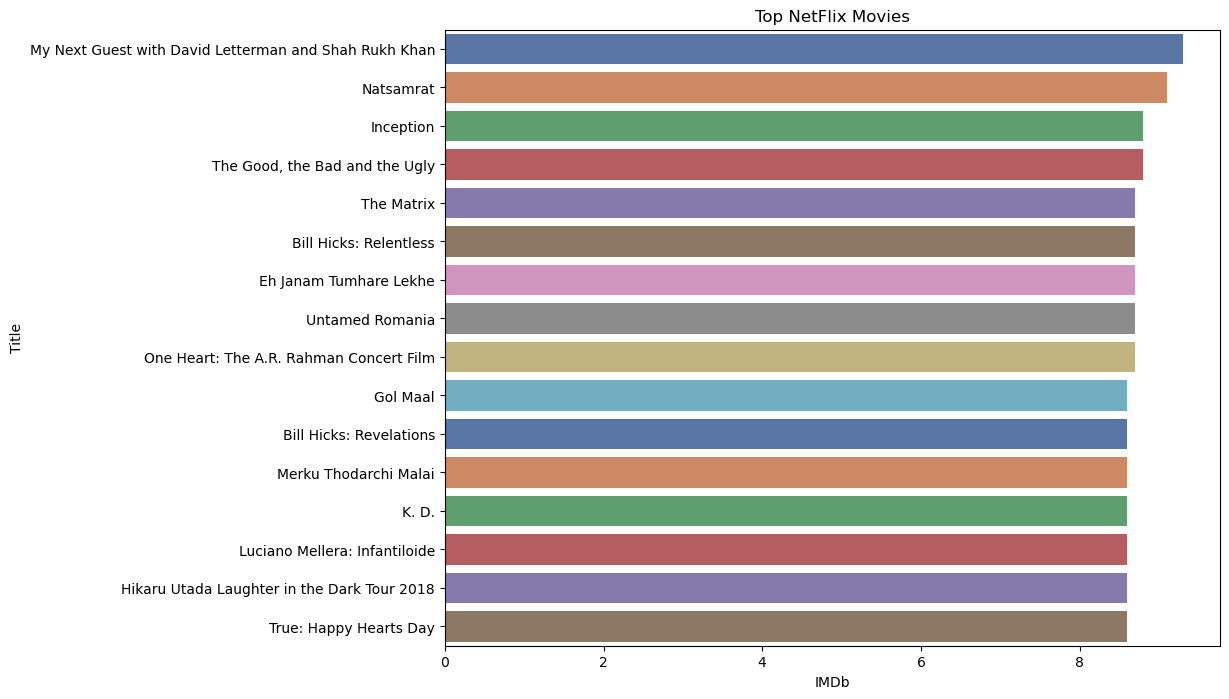

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(x='IMDb',y='Title',data=data_netflix_top, palette='deep')
plt.title('Top NetFlix Movies')
plt.show()

# Hulu

In [37]:
data_hulu_top = data_hulu[data_hulu['IMDb']>8.5]
data_hulu_top = data_hulu_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')

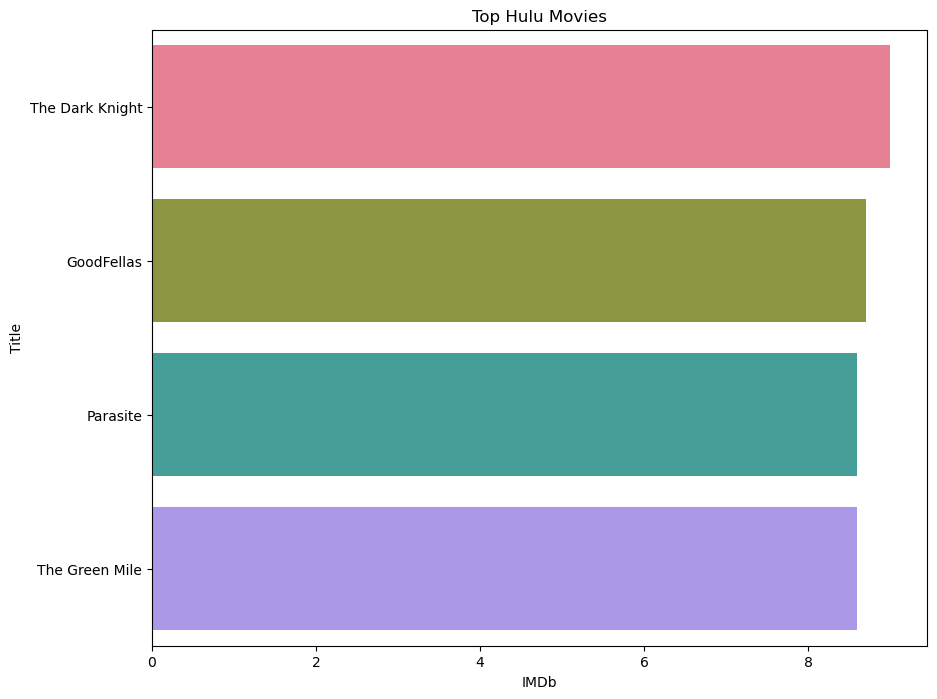

In [38]:
plt.figure(figsize=(10,8))
sns.barplot(x='IMDb',y='Title',data=data_hulu_top, palette='husl')
plt.title('Top Hulu Movies')
plt.show()

# Disney+

In [39]:
data_disney_top = data_disney[data_disney['IMDb']>8.5]
data_disney_top = data_disney_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')

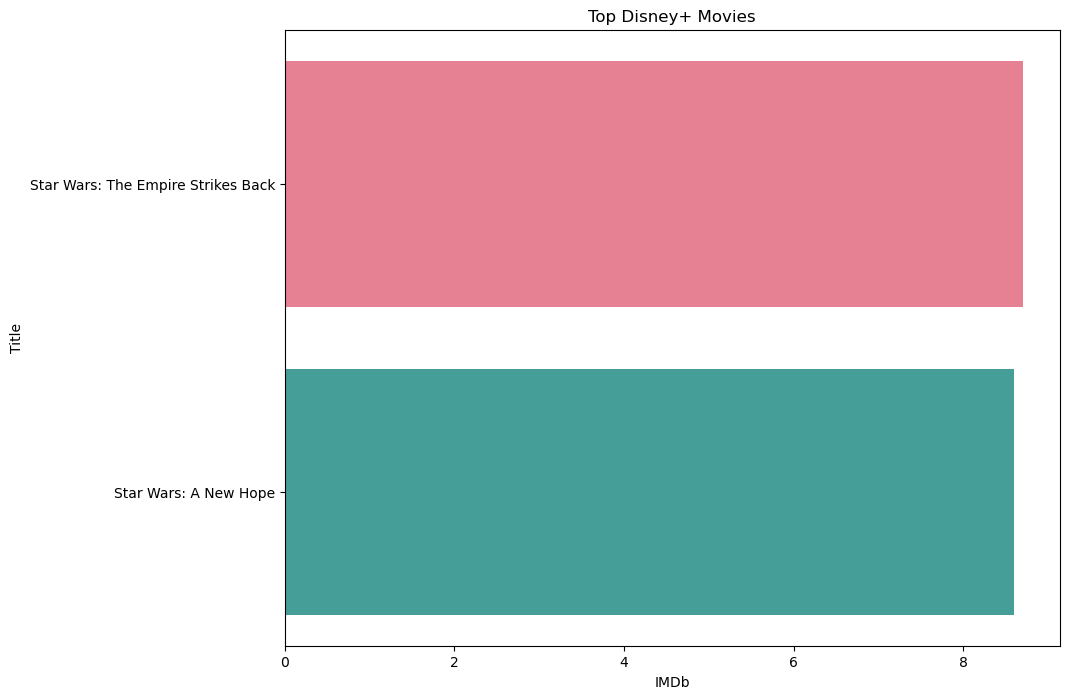

In [40]:
plt.figure(figsize=(10,8))
sns.barplot(x='IMDb',y='Title',data=data_disney_top, palette='husl')
plt.title('Top Disney+ Movies')
plt.show()

# Prime Video

In [41]:
data_prime_top = data_prime[data_prime['IMDb']>8.5]
data_prime_top = data_prime_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')[:10]

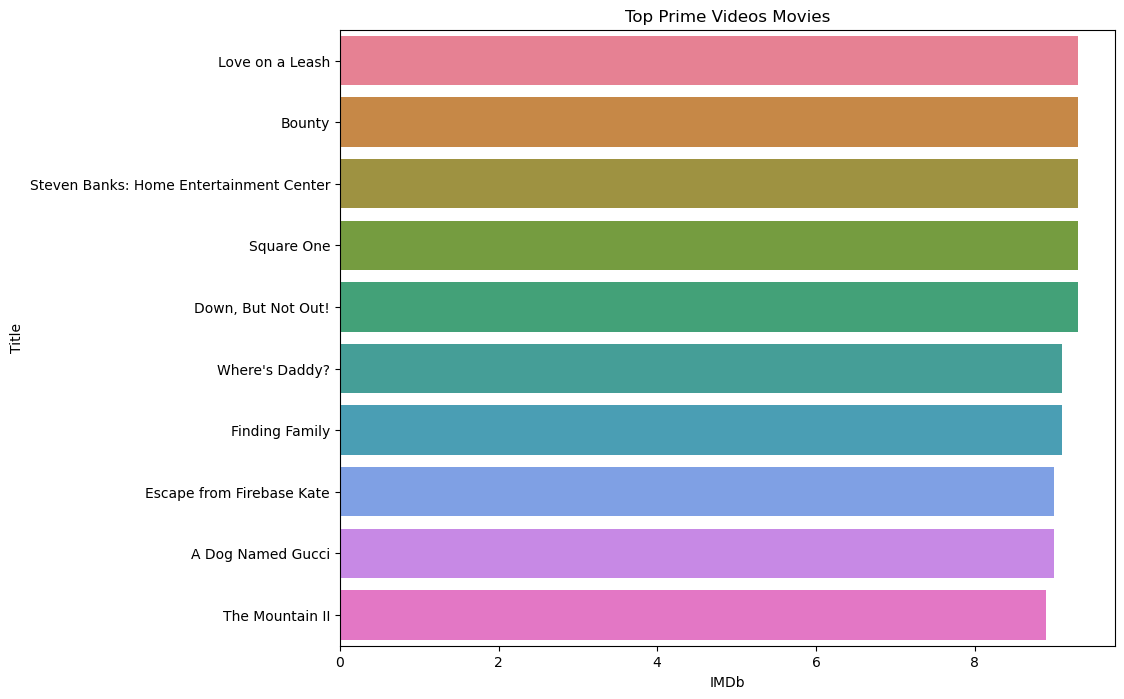

In [42]:
plt.figure(figsize=(10,8))
sns.barplot(x='IMDb',y='Title',data=data_prime_top, palette='husl')
plt.title('Top Prime Videos Movies')
plt.show()

# Directors with Most Movies

In [47]:
len(data['Directors'])

16744

In [48]:
directors = list(set(data['Directors']))
directors.pop(0) #TO REMOVE NAN VALUE
len(directors)

11338

# By converting it to Set we reduced the number from 16k to 11k

In [51]:
new_director = set()
for d in directors:
    curr_d = str(d).split(",")  # Convert to string before splitting
    for direc in curr_d:
        if direc.strip() in new_director:  # Use strip() to remove whitespace
            continue
        else:
            new_director.add(direc.strip())  # Add stripped director to the set
len(new_director)

12453

# Most of the movies have more than 1 director, hence extarcted all the names of directors in the dataset

In [52]:
%%time
new_data = data[data['Directors'].notna()]
directors_count = dict()
direc_in_data = list(new_data['Directors'])
for xdir in direc_in_data:
    curr_dirs = xdir.split(",")
    for xd in curr_dirs:
        if xd in directors_count.keys():
            directors_count[xd] = directors_count.get(xd) + 1
        else:
            directors_count[xd] = 1

CPU times: total: 0 ns
Wall time: 26 ms


In [53]:
directors_count_df = pd.DataFrame(directors_count.items(), columns=['Director', 'Count'])
directors_count_df.sort_values(ascending=False, by='Count').head()

,Director,Count
976,Jay Chapman,36
8165,Joseph Kane,31
1102,Cheh Chang,29
4826,Jim Wynorski,23
6949,William Beaudine,23


In [54]:
directors_count_df.sort_values(ascending=False, by='Count')[:20].iplot(kind='bar', 
                                                                  x='Director', 
                                                                  xTitle='Director', 
                                                                  yTitle='Count', colors='Blue', 
                                                                  title='Director vs Count')

Jay Chapman has directed most number of movies as per our calculations. Lets see the moveis he has directed

In [55]:
data[data['Directors']=='Jay Chapman']

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,intAge,New_Rotten_Tomatoes
1014,Jim Gaffigan: Obsessed,2014,16+,7.6,100%,1,0,0,0,0,Jay Chapman,"Documentary,Comedy",United States,English,60.0,16.0,100
1234,Iliza Shlesinger: War Paint,2013,NaN,6.7,NaN,1,0,1,0,0,Jay Chapman,Comedy,United States,English,75.0,NaN,NaN
1417,Tom Segura: Completely Normal,2014,NaN,7.8,NaN,1,0,1,0,0,Jay Chapman,"Documentary,Comedy",United States,English,74.0,NaN,NaN
2211,Todd Barry: Spicy Honey,2017,NaN,6.7,NaN,1,0,0,0,0,Jay Chapman,Comedy,United States,English,60.0,NaN,NaN
2331,Craig Ferguson: Tickle Fight,2017,NaN,6.6,NaN,1,0,0,0,0,Jay Chapman,Comedy,United States,English,66.0,NaN,NaN
2393,Colin Quinn: Unconstitutional,2015,NaN,7.1,NaN,1,0,1,0,0,Jay Chapman,Comedy,United States,English,55.0,NaN,NaN
2447,Lucas Brothers: On Drugs,2017,NaN,5.5,NaN,1,0,0,0,0,Jay Chapman,Comedy,United States,English,50.0,NaN,NaN
2523,D.L. Hughley: Contrarian,2018,NaN,6.5,NaN,1,0,0,0,0,Jay Chapman,Comedy,United States,English,58.0,NaN,NaN
2636,D.L. Hughley: Clear,2014,NaN,6.7,NaN,1,0,1,0,0,Jay Chapman,Comedy,United States,English,60.0,NaN,NaN
2721,Moshe Kasher: Live in Oakland,2012,NaN,6.8,NaN,1,0,1,0,0,Jay Chapman,Comedy,United States,NaN,61.0,NaN,NaN


Here the List of moveis and other details for movies directed by Jay Chapman.

# Exploring Genres

In [56]:
%%time
genres_unclean = dict(data['Genres'].value_counts())
genres = set()
for g,count in genres_unclean.items():
    curr_g = g.split(",")
    for xg in curr_g:
        if xg in genres:
            continue
        else:
            genres.add(xg)

CPU times: total: 0 ns
Wall time: 14.5 ms


In [57]:
%%time
count_genres = dict()
for g,count in genres_unclean.items():
    curr_g = g.split(",")
    for xg in curr_g:
        if xg in count_genres.keys():
            count_genres[xg] = count_genres.get(xg)+1
        else:
            count_genres[xg] = 1

CPU times: total: 0 ns
Wall time: 8.99 ms


In [58]:
count_genres_df = pd.DataFrame(count_genres.items(), columns=['Genre', 'Count'])

In [60]:
count_genres_df.sort_values(ascending=False, by='Count').iplot(kind="bar", x='Genre', xTitle='Genre', yTitle='Count', title='Count of Genres', color='pink')

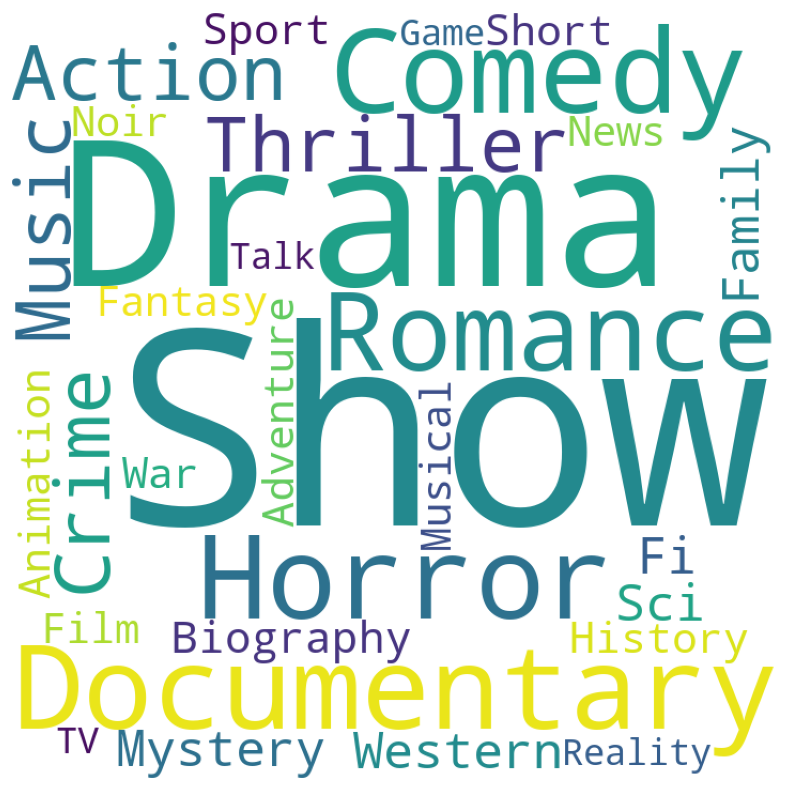

In [61]:
plt.subplots(figsize = (10,10))

wordcloud_genre = WordCloud (
                    background_color = 'white',
                    width = 720,
                    height = 720
                        ).generate(' '.join(count_genres_df['Genre']))
plt.imshow(wordcloud_genre) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

# Movie/Show Runtime

In [46]:
pd.DataFrame(dict(data['Runtime'].value_counts().sort_values(ascending=False)[:20]).items(), columns=['Runtime', 'Count']).iplot(kind='bar' ,
                                                                                                                                 x='Runtime', 
                                                                                                                                 xTitle='Runtime', 
                                                                                                                                 yTitle='Count', title='Runtime vs Count',
                                                                                                                                colors='Magenta')

# Average Runtime of Movies in each Platform

In [43]:
dur_n = round(data_netflix['Runtime'].sum()/data_netflix.shape[0],2)
dur_h = round(data_hulu['Runtime'].sum()/data_hulu.shape[0],2)
dur_p = round(data_prime['Runtime'].sum()/data_prime.shape[0],2)
dur_d = round(data_disney['Runtime'].sum()/data_disney.shape[0],2)
print(dur_n, dur_h, dur_p, dur_d)

92.83 95.46 89.6 88.98


In [44]:
duration_df = pd.DataFrame({
    'Streaming Platform' : ['NetFlix','Hulu','Prime Video','Disney+'],
    'Duration' : [dur_n, dur_h, dur_p, dur_d]
})
duration_df.head()

,Streaming Platform,Duration
0,NetFlix,92.83
1,Hulu,95.46
2,Prime Video,89.60
3,Disney+,88.98


In [45]:
duration_df.sort_values(ascending=False, by='Duration').iplot(kind="bar", x='Streaming Platform', 
                                                              xTitle='Streaming Platform', 
                                                              yTitle='Duration', title='Average Duration', color='Red')

# Here we can see HULU is the best streaming platfrom